#                                 Exploratory Data Analysis of Zomato Data in Python



In [167]:
# data maniupulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#others
from fuzzywuzzy import fuzz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [168]:
# read data
df = pd.read_csv("zomato_dataset.csv")

In [169]:
# view top 5 rows
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [170]:
# View dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [171]:
# Check column names
df.columns


Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [172]:
# Alter columns names
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [173]:
df.columns

Index(['restaurant_name', 'dining_rating', 'delivery_rating', 'dining_votes',
       'delivery_votes', 'cuisine', 'place_name', 'city', 'item_name',
       'best_seller', 'votes', 'prices'],
      dtype='object')

In [174]:
# Rename "Votes" columns
df = df.rename(columns={'votes': 'votes_items'})

In [175]:
df.columns

Index(['restaurant_name', 'dining_rating', 'delivery_rating', 'dining_votes',
       'delivery_votes', 'cuisine', 'place_name', 'city', 'item_name',
       'best_seller', 'votes_items', 'prices'],
      dtype='object')

In [176]:
# Check null values 
df.isnull().sum()

restaurant_name        0
dining_rating      32236
delivery_rating     1280
dining_votes           0
delivery_votes         0
cuisine                0
place_name             0
city                   0
item_name              0
best_seller        95715
votes_items            0
prices                 0
dtype: int64

In [177]:
# Fill null values with 0
df["dining_rating"].fillna(0, inplace=True)
df["delivery_rating"].fillna(0, inplace=True)

In [178]:
# Check value count 
df["best_seller"].value_counts()

best_seller
BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: count, dtype: int64

In [179]:
# Encode bestseller as 1 and other 0
df["best_seller"] = np.where(df["best_seller"]=='BESTSELLER',1,0)

In [180]:
# Check value for encode
df["best_seller"].value_counts()

best_seller
0    106665
1     16992
Name: count, dtype: int64

In [181]:
# Check null values after the change
df.isnull().sum()

restaurant_name    0
dining_rating      0
delivery_rating    0
dining_votes       0
delivery_votes     0
cuisine            0
place_name         0
city               0
item_name          0
best_seller        0
votes_items        0
prices             0
dtype: int64

In [182]:
# Duplicate rows
df[df.duplicated()].head()

,restaurant_name,dining_rating,delivery_rating,dining_votes,delivery_votes,cuisine,place_name,city,item_name,best_seller,votes_items,prices
15,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,1,84,249.0
16,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Platter Kebab Combo,1,27,279.0
18,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,0,31,205.0
19,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,0,39,189.0
20,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,1,43,189.0


In [183]:
# Number of duplicates rows
df[df.duplicated()].shape[0]

24523

In [184]:
# Drop duplicated and check dataframes shape
df = df.drop_duplicates()
print(df.shape)

(99134, 12)


In [185]:
# Check value counts
df["restaurant_name"].value_counts()

restaurant_name
McDonald's                                          1492
FreshMenu                                           1011
Burger King                                          943
Pizza Hut                                            822
Domino's Pizza                                       757
La Pino'z Pizza                                      721
The Momoz Hub                                        670
Subway                                               653
Savoury Sea Shell                                    566
Raj Restaurant                                       525
Marky Momos                                          502
Capital Multi Cuisine Restaurant                     486
Kanha                                                484
Casa Blanca                                          481
KFC                                                  478
Harishankar Veg Restro                               448
Urban Biryani                                        432
Apoorva Delicac

In [186]:
# check for typos in names

restaurant_names = df["restaurant_name"].unique().tolist() # list of unique restaurant names

# initialize a dictionary to store potential typos
potential_typos = {}

# compare each pair of names
for i in range(len(restaurant_names)):
    for j in range(i+1, len(restaurant_names)):
        similarity = fuzz.ratio(restaurant_names[i].lower(), restaurant_names[j].lower())
        if similarity > 85:  # adjust the threshold 
            potential_typos[(restaurant_names[i], restaurant_names[j])] = similarity

# print potential typos
print("Potential Typos:")
for names, similarity in potential_typos.items():
    print(f"Similarity: {similarity}% - Names: {names}")

Potential Typos:
Similarity: 88% - Names: ('Red Bucket Biryani', 'Bucket Biryani')
Similarity: 87% - Names: ('Santosh Dhaba', 'New Santosh Dhaba')
Similarity: 98% - Names: ('Kwality Wall\x92s Frozen Dessert and Ice Cream Shop', "Kwality Wall's Frozen Dessert And Ice Cream Shop")
Similarity: 100% - Names: ('Kwality Wall\x92s Frozen Dessert and Ice Cream Shop', 'Kwality Wall\x92s Frozen Dessert And Ice Cream Shop')
Similarity: 88% - Names: ('Akbar Fast Food', 'Ambaram Fast Food')
Similarity: 86% - Names: ('Redaan Restaurant', 'Shadaan Restaurant')
Similarity: 88% - Names: ('Redaan Restaurant', 'Rumaan Restaurant')
Similarity: 88% - Names: ('Sarvi Restaurant', 'Saima Restaurant')
Similarity: 88% - Names: ('Sahara Family Restaurant', 'Jhakas Family Restaurant')
Similarity: 88% - Names: ('Liza Restaurant', 'Pakiza Restaurant')
Similarity: 88% - Names: ('The Pizza Unlimited', 'Pizza Unlimited')
Similarity: 94% - Names: ('Unlimited Pizza & Fast Food Corner', 'Unlimited Pizza and Fast Food Cor

In [187]:
# cross check restaurants with similar names
df[df["restaurant_name"].isin(['Santosh Dhaba', 'New Santosh Dhaba'])].iloc[[0, -1]]

,restaurant_name,dining_rating,delivery_rating,dining_votes,delivery_votes,cuisine,place_name,city,item_name,best_seller,votes_items,prices
4021,Santosh Dhaba,4.3,3.9,0,0,Desserts,Abids,Hyderabad,Paneer Butter Masala,1,281,300.0
14596,New Santosh Dhaba,4.2,3.7,209,0,Beverages,Begum Bazaar,Hyderabad,All Cool Beverage,0,0,30.0


In [188]:
# check value counts
df["city"].value_counts()

city
 Hyderabad       12746
 Mumbai          11420
 Chennai         10931
 Jaipur          10799
 Bangalore        9223
 Ahmedabad        8352
 Kolkata          6774
 Pune             6525
 Raipur           6112
 Kochi            6065
 Lucknow          4943
 New Delhi        2807
 Goa              2227
 Banaswadi          85
 Ulsoor             54
 Magrath Road       40
 Malleshwaram       31
Name: count, dtype: int64

In [189]:
# change city names
df['city'] = df['city'].str.replace('Banaswadi|Ulsoor|Magrath Road|Malleshwaram', 'Bangalore', regex=True)

In [190]:
# check value counts after changes
df["city"].value_counts()

city
 Hyderabad    12746
 Mumbai       11420
 Chennai      10931
 Jaipur       10799
 Bangalore     9433
 Ahmedabad     8352
 Kolkata       6774
 Pune          6525
 Raipur        6112
 Kochi         6065
 Lucknow       4943
 New Delhi     2807
 Goa           2227
Name: count, dtype: int64

In [191]:
# Exploratory Data Analysis (EDA) + Feature Engineering


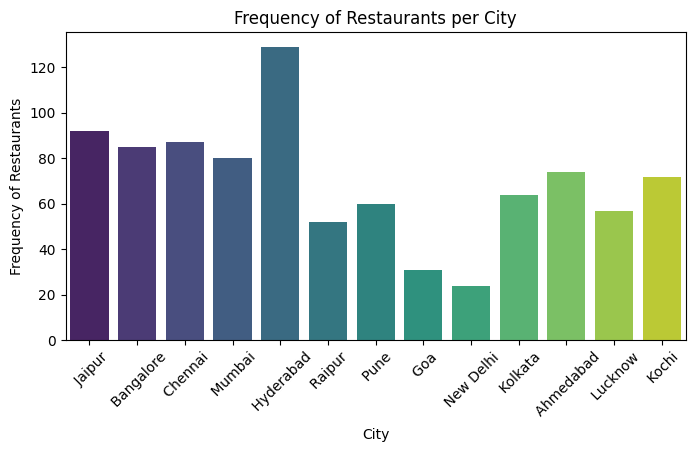

In [192]:
# group by unique restaurants in each city
restaurant_city_counts = df.groupby('restaurant_name')['city'].value_counts().sort_values(ascending=False).reset_index(name='frequency')

# set plot size
plt.figure(figsize=(8,4))

# plot countplot
sns.countplot(data=restaurant_city_counts, x='city',hue='city', palette='viridis',legend=False)

# add labels and title
plt.title('Frequency of Restaurants per City')
plt.xlabel('City')
plt.ylabel('Frequency of Restaurants')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.savefig('1.1.png')

# show the plot
plt.show()

In [193]:
# calculate total_votes from dining_votes, delivery_votes, item_votes
df["total_votes"] = df["dining_votes"] + df["delivery_votes"] + df["votes_items"]

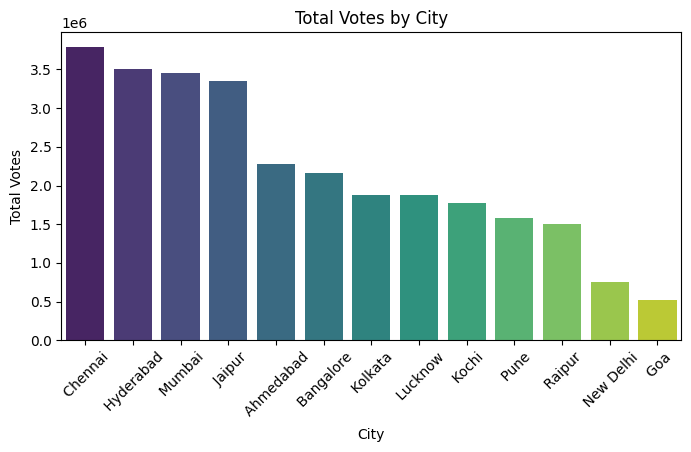

In [194]:
# group by city
city_votes = df.groupby('city')['total_votes'].sum().sort_values(ascending=False).reset_index()

# set plot size
plt.figure(figsize=(8,4))

# plot barplot
sns.barplot(data=city_votes, x='city',hue = 'city',legend = False, y='total_votes', palette='viridis')

# add labels and title
plt.title('Total Votes by City')
plt.xlabel('City')
plt.ylabel('Total Votes')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.savefig('1.2.png')

# show the plot
plt.show()

In [195]:
# filter data for Chennai city
df_chennai = df[df['city'] == 'Chennai']

In [196]:
# Print the first few rows of the original DataFrame
print(df.head())

# Check unique values in the 'city' column
print(df['city'].unique())


  restaurant_name  dining_rating  delivery_rating  dining_votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   delivery_votes    cuisine place_name        city                 item_name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

   best_seller  votes_items  prices  total_votes  
0            1           84   249.0          123  
1       

In [197]:
# Strip leading/trailing spaces in the 'city' column (if necessary)
df['city'] = df['city'].str.strip()

# Now filter for Chennai again
df_chennai = df[df['city'] == 'Chennai']

# Print to verify
print(df_chennai)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



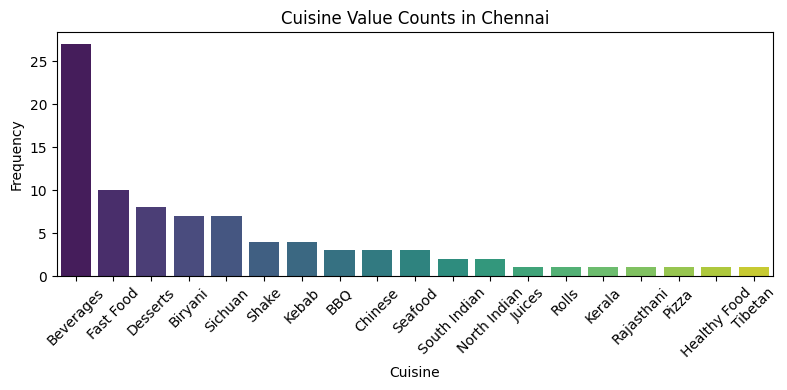

In [198]:
# group by restaurant name and cuisine
chennai_cuisine_counts = df_chennai.groupby(['restaurant_name', 'cuisine']).size().reset_index(name='frequency')
cuisine_value_counts = chennai_cuisine_counts['cuisine'].value_counts()
cuisine_counts_df = pd.DataFrame({'cuisine': cuisine_value_counts.index, 'frequency': cuisine_value_counts.values})
# set plot size
plt.figure(figsize=(8, 4))

# plot barplot
sns.barplot(x=cuisine_value_counts.index,data=cuisine_counts_df, y=cuisine_value_counts.values, palette='viridis',hue='cuisine')

# add labels and title
plt.title('Cuisine Value Counts in Chennai')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.tight_layout()
plt.savefig('2.1.png')

# show the plot
plt.show()

In [199]:
# display restaurant names for each cuisine
df_chennai[df_chennai['cuisine'] == 'Kebab'].groupby('restaurant_name').first()

,dining_rating,delivery_rating,dining_votes,delivery_votes,cuisine,place_name,city,item_name,best_seller,votes_items,prices,total_votes
restaurant_name,,,,,,,,,,,,
Ibrahim Biriyani,3.8,4.0,41,0,Kebab,Kilpauk,Chennai,Chicken 65 Biryani,1,110,160.0,151
Shawarma Kings,0.0,4.0,0,0,Kebab,Anna Nagar East,Chennai,Classic Chicken Shawarma,1,76,105.0,76
Taste Of Turkey,0.0,4.3,0,258,Kebab,George Town,Chennai,Barbeque Chicken,0,0,299.0,258
The Kati Roll Shop,4.2,4.0,422,0,Kebab,Gopalapuram,Chennai,Anda Chicken Roll,1,162,199.0,584


In [200]:
# check the food item for each restaurant 
df_chennai[(df_chennai['restaurant_name'] == "Ibrahim Biriyani")][["restaurant_name", "item_name"]]

,restaurant_name,item_name
29887,Ibrahim Biriyani,Chicken 65 Biryani
29888,Ibrahim Biriyani,Chicken Biryani
29889,Ibrahim Biriyani,Mutton Biryani
29890,Ibrahim Biriyani,Egg Biryani
29891,Ibrahim Biriyani,Plain Biryani
29894,Ibrahim Biriyani,Plain Biryani


In [201]:

""""df.loc[(df['restaurant_name'] == 'The Chef Company'), 'cuisine'] = 'South Indian'
df.loc[(df['restaurant_name'] == 'Basheer Bai Biriyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Five Star Chicken'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'A2B - Adyar Ananda Bhavan'), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'Potful - Claypot Biryanis'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Zam Zam Briyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Armaani Biryani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Salem RR Biriyani Unavagam'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'WOW! China') & (df['city'] == 'Chennai'), 'cuisine'] = 'Chinese'
df.loc[(df['restaurant_name'] == 'A1 Ambur Briyani & Kababs'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Khalids Biriyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == "Reena Paul's Kitchen"), 'cuisine'] = "Kerala"
df.loc[(df['restaurant_name'] == "Little Hut"), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == "Madurai Pandian Mess"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == "Ibrahim Biriyani"), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == "The Kati Roll Shop"), 'cuisine'] = "Rolls"
df.loc[(df['restaurant_name'] == 'Keifer'), 'cuisine'] = "Beverages"
df.loc[(df['restaurant_name'] == "Mathsya"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == "Sangeetha Veg Restaurant - Gandhi Irwin Road"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'The Burger Cafe'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Ambur Star Briyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'BBQ Master'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Bismillah Briyani & Fast Foods'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Navrang Restaurant'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'Nxtdoor'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Savoury Sea Shell'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Taj Mughalai'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'Ambaram Fast Food'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Little India'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == "AB's - Absolute Barbecues"), 'cuisine'] = "BBQ"
df.loc[(df['restaurant_name'] == "UBQ by Barbeque Nation"), 'cuisine'] = "BBQ"
df.loc[(df['restaurant_name'] == "Domino's Pizza"), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Oyalo Pizza'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Little Italy'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == "Shero Home Food - Chettinad"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'The Old Mirchi Biryani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Wangs Kitchen'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Riyas Biriyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Tower Burger'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == "Writer's Cafe"), 'cuisine'] = "Cafe"
df.loc[(df['restaurant_name'] == "Toscano"), 'cuisine'] = "Cafe"
df.loc[(df['restaurant_name'] == 'The High Joint'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == "Thanjai Veeraswamy"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == "Samco"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'Ponnusamy Hotel'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Meat And Eat'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Liza Restaurant'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'Kim Ling Chinese Restaurant'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'KMS Hakkim Kalyana Biriyani'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Junior Kuppanna'), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'Hotel Sennthur'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Hotel Paramount'), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'Grill A Delics'), 'cuisine'] = "Chinese"
df.loc[(df['restaurant_name'] == 'Great Indian Khichdi by EatFit'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'EatFit'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'Delhi Dhaba'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == "Chidambaram New Moorthy Cafe"), 'cuisine'] = "Cafe"
df.loc[(df['restaurant_name'] == "Cafe Amin"), 'cuisine'] = "Cafe"
df.loc[(df['restaurant_name'] == 'BurgerMan'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Babal Da Punjabi Dabha'), 'cuisine'] = "North Indian"
df.loc[(df['restaurant_name'] == 'Al Faham'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Al Baik'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'Anjappar'), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == 'Buhari Vintage Hotel'), 'cuisine'] = "Biryani"
df.loc[(df['restaurant_name'] == 'Tibet Momo - World Class Pan Asian Cuisine'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == 'The Kati Roll Shop'), 'cuisine'] = "Fast Food"
df.loc[(df['restaurant_name'] == "Reena Paul's Kitchen"), 'cuisine'] = "South Indian"
df.loc[(df['restaurant_name'] == "Agarwal's Desi Khana Khazana"), 'cuisine'] = "North Indian"""""
     

'"df.loc[(df[\'restaurant_name\'] == \'The Chef Company\'), \'cuisine\'] = \'South Indian\'\ndf.loc[(df[\'restaurant_name\'] == \'Basheer Bai Biriyani\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'Five Star Chicken\'), \'cuisine\'] = "Fast Food"\ndf.loc[(df[\'restaurant_name\'] == \'A2B - Adyar Ananda Bhavan\'), \'cuisine\'] = "South Indian"\ndf.loc[(df[\'restaurant_name\'] == \'Potful - Claypot Biryanis\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'Zam Zam Briyani\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'Armaani Biryani\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'Salem RR Biriyani Unavagam\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'WOW! China\') & (df[\'city\'] == \'Chennai\'), \'cuisine\'] = \'Chinese\'\ndf.loc[(df[\'restaurant_name\'] == \'A1 Ambur Briyani & Kababs\'), \'cuisine\'] = "Biryani"\ndf.loc[(df[\'restaurant_name\'] == \'Khalids Biriyani\'), \'cuisine\'] = "Bi

In [202]:
# create a mapping for the incorrect restaurant's cuisine
restaurant_cuisine_mapping = {
    'The Chef Company': 'South Indian',
    'Basheer Bai Biriyani': 'Biryani',
    'Five Star Chicken': 'Fast Food',
    'A2B - Adyar Ananda Bhavan': 'South Indian',
    'Potful - Claypot Biryanis': 'Biryani',
    'Zam Zam Briyani': 'Biryani',
    'Armaani Biryani': 'Biryani',
    'Salem RR Biriyani Unavagam': 'Biryani',
    'WOW! China': 'Chinese',
    'A1 Ambur Briyani & Kababs': 'Biryani',
    'Khalids Biriyani': 'Biryani',
    'Little Hut': 'Biryani',
    'Madurai Pandian Mess': 'South Indian',
    'Ibrahim Biriyani': 'Biryani',
    'Keifer': 'Beverages',
    'Mathsya': 'South Indian',
    'Sangeetha Veg Restaurant - Gandhi Irwin Road': 'South Indian',
    'The Burger Cafe': 'Fast Food',
    'Ambur Star Briyani': 'Biryani',
    'BBQ Master': 'Chinese',
    'Bismillah Briyani & Fast Foods': 'Biryani',
    'Navrang Restaurant': 'North Indian',
    'Nxtdoor': 'Chinese',
    'Savoury Sea Shell': 'Chinese',
    'Taj Mughalai': 'North Indian',
    'Ambaram Fast Food': 'Fast Food',
    'Little India': 'North Indian',
    "AB's - Absolute Barbecues": 'BBQ',
    "UBQ by Barbeque Nation": 'BBQ',
    "Domino's Pizza": 'Fast Food',
    'Oyalo Pizza': 'Fast Food',
    'Little Italy': 'Fast Food',
    "Shero Home Food - Chettinad": 'South Indian',
    'The Old Mirchi Biryani': 'Biryani',
    'Wangs Kitchen': 'Chinese',
    'Riyas Biriyani': 'Biryani',
    'Tower Burger': 'Fast Food',
    "Writer's Cafe": 'Cafe',
    "Toscano": 'Cafe',
    'The High Joint': 'Fast Food',
    "Thanjai Veeraswamy": 'South Indian',
    "Samco": 'South Indian',
    'Ponnusamy Hotel': 'Chinese',
    'Meat And Eat': 'Fast Food',
    'Liza Restaurant': 'North Indian',
    'Kim Ling Chinese Restaurant': 'Chinese',
    'KMS Hakkim Kalyana Biriyani': 'Biryani',
    'Junior Kuppanna': 'South Indian',
    'Hotel Sennthur': 'Fast Food',
    'Hotel Paramount': 'South Indian',
    'Grill A Delics': 'Chinese',
    'Great Indian Khichdi by EatFit': 'North Indian',
    'EatFit': 'North Indian',
    'Delhi Dhaba': 'North Indian',
    "Chidambaram New Moorthy Cafe": 'Cafe',
    "Cafe Amin": 'Cafe',
    'BurgerMan': 'Fast Food',
    'Babal Da Punjabi Dabha': 'North Indian',
    'Al Faham': 'Biryani',
    'Al Baik': 'Fast Food',
    'Anjappar': 'South Indian',
    'Buhari Vintage Hotel': 'Biryani',
    'Tibet Momo - World Class Pan Asian Cuisine': 'Fast Food',
    'The Kati Roll Shop': 'Fast Food',
    "Reena Paul's Kitchen": 'South Indian',
    "Agarwal's Desi Khana Khazana": 'North Indian'
}

for restaurant_name, cuisine in restaurant_cuisine_mapping.items():
    df_chennai.loc[df_chennai['restaurant_name'] == restaurant_name, 'cuisine'] = cuisine

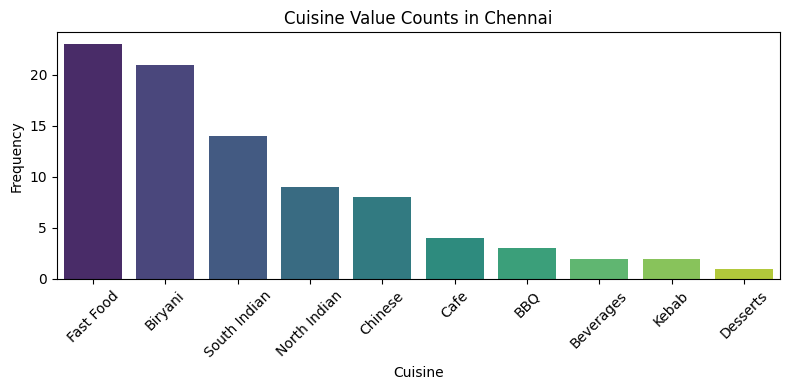

In [203]:
# plot the cuisine value counts again

# group by restaurant name and cuisine
chennai_cuisine_counts = df_chennai.groupby(['restaurant_name', 'cuisine']).size().reset_index(name='frequency')
cuisine_value_counts = chennai_cuisine_counts['cuisine'].value_counts()
cuisine_counts_df = pd.DataFrame({'cuisine': cuisine_value_counts.index, 'frequency': cuisine_value_counts.values})
# set plot size
plt.figure(figsize=(8, 4))

# plot barplot
sns.barplot(x=cuisine_value_counts.index,data=cuisine_counts_df, y=cuisine_value_counts.values, palette='viridis',hue='cuisine')

# add labels and title
plt.title('Cuisine Value Counts in Chennai')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# save the plot
plt.tight_layout()
plt.savefig('2.2.png')

# show the plot
plt.show()

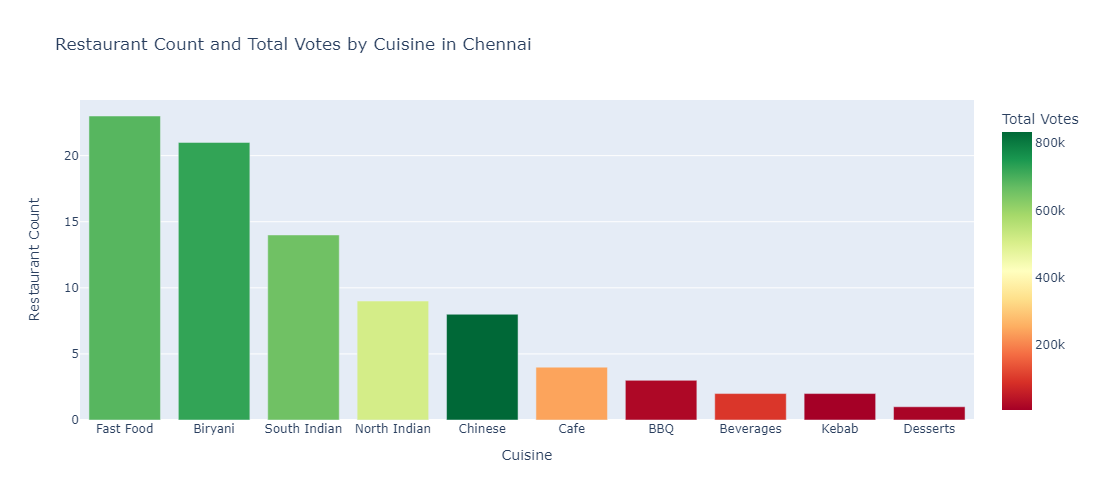

In [204]:
# plot cuisine vs restaurant count with total_votes as hue

# group by cuisine and get count of restaurants
restaurant_count = df_chennai.groupby('cuisine')['restaurant_name'].nunique().reset_index()

# group by cuisine and get total votes
total_votes = df_chennai.groupby('cuisine')['total_votes'].sum().reset_index()

# merge the two dataframes on cuisine
merged_data = pd.merge(restaurant_count, total_votes, on='cuisine', how='inner')

# create the plot
fig = px.bar(merged_data, x='cuisine', y='restaurant_name', color='total_votes',
             labels={'cuisine': 'Cuisine', 'restaurant_name': 'Restaurant Count', 'total_votes': 'Total Votes'},
             title='Restaurant Count and Total Votes by Cuisine in Chennai',
             color_continuous_scale='RdYlGn')

# order in descending
fig.update_xaxes(categoryorder='total descending')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()
     


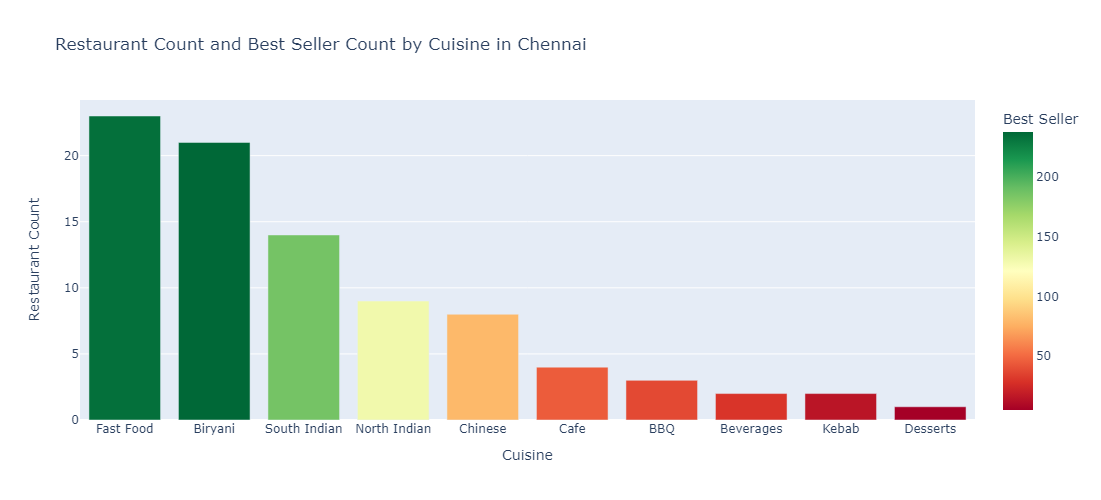

In [205]:
# plot cuisine vs restaurant count with best_seller as hue

# group by cuisine and get count of restaurants
restaurant_count = df_chennai.groupby('cuisine')['restaurant_name'].nunique().reset_index()

# group by cuisine and get total votes
total_votes = df_chennai.groupby('cuisine')['best_seller'].sum().reset_index()

# merge the two dataframes on cuisine
merged_data = pd.merge(restaurant_count, total_votes, on='cuisine', how='inner')

# create the plot
fig = px.bar(merged_data, x='cuisine', y='restaurant_name', color='best_seller',
             labels={'cuisine': 'Cuisine', 'restaurant_name': 'Restaurant Count', 'best_seller': 'Best Seller'},
             title='Restaurant Count and Best Seller Count by Cuisine in Chennai',
             color_continuous_scale='RdYlGn')

# order in descending
fig.update_xaxes(categoryorder='total descending')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()

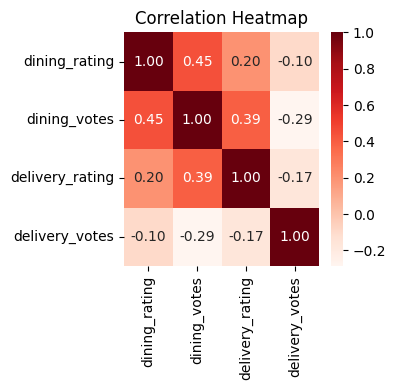

In [206]:
# plot heatmap between 'dining_rating', 'dining_votes', 'delivery_rating', 'delivery_votes'

# select the columns
correlation_data = df_chennai[['dining_rating', 'dining_votes', 'delivery_rating', 'delivery_votes']]

# calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# set plot size
plt.figure(figsize=(4, 4))

# create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")

# add title
plt.title('Correlation Heatmap')

# save the plot
plt.tight_layout()
plt.savefig('3.1.png')

# show the plot
plt.show()
     

In [207]:
# count the number of zeros in each column
num_zeros_dining_rating = (df_chennai['dining_rating'] == 0).sum()
num_zeros_delivery_rating = (df_chennai['delivery_rating'] == 0).sum()
num_zeros_dining_votes = (df_chennai['dining_votes'] == 0).sum()
num_zeros_delivery_votes = (df_chennai['delivery_votes'] == 0).sum()

# print the results
print(f'Number of zeros in dining_rating: {num_zeros_dining_rating}')
print(f'Number of zeros in dining_votes: {num_zeros_dining_votes}')
print(f'Number of zeros in delivery_rating: {num_zeros_delivery_rating}')
print(f'Number of zeros in delivery_votes: {num_zeros_delivery_votes}')

Number of zeros in dining_rating: 1902
Number of zeros in dining_votes: 2529
Number of zeros in delivery_rating: 0
Number of zeros in delivery_votes: 7981


In [208]:
# create 2 new columns dining_preferred & delivery_preferred if thier respective votes are in top 0.75 quantile and rating is greater than 4

# dining_preferred
threshold_dining_votes = df_chennai.groupby('cuisine')['dining_votes'].quantile(0.75)

df_chennai['dining_preferred'] = df_chennai.apply(
    lambda row: 1 if (row['dining_rating'] >= 4 or row['dining_votes'] >= threshold_dining_votes[row['cuisine']]) else 0,
    axis=1
)

# delivery_preferred
threshold_delivery_votes = df_chennai.groupby('cuisine')['delivery_votes'].quantile(0.75)
df_chennai['delivery_preferred'] = df_chennai.apply(
    lambda row: 1 if (row['delivery_rating'] >= 4 or row['delivery_votes'] >= threshold_delivery_votes[row['cuisine']]) else 0,
    axis=1
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19312\2340829173.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19312\2340829173.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
# create the restaurant_type column based on conditions
df_chennai['restaurant_type'] = 'Takeaway'
df_chennai.loc[(df_chennai['delivery_preferred'] == 1) & (df_chennai['dining_preferred'] == 0), 'restaurant_type'] = 'Delivery'
df_chennai.loc[(df_chennai['delivery_preferred'] == 0) & (df_chennai['dining_preferred'] == 1), 'restaurant_type'] = 'Dining'
df_chennai.loc[(df_chennai['delivery_preferred'] == 1) & (df_chennai['dining_preferred'] == 1), 'restaurant_type'] = 'Dining & Delivery'
     

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19312\4086586841.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
# drop redundant columns
df_chennai = df_chennai.drop(['dining_rating', 'delivery_rating', 'dining_votes', 'delivery_votes', 'dining_preferred', 'delivery_preferred'], axis=1)
df_chennai.head()

,restaurant_name,cuisine,place_name,city,item_name,best_seller,votes_items,prices,total_votes,restaurant_type
27342,Dindigul Veetu Kalyanam,Biryani,Egmore,Chennai,DVK - Chicken Seeraga Samba Biryani - Standard Pack ( 600 ML ),1,237,249.0,838,Delivery
27343,Dindigul Veetu Kalyanam,Biryani,Egmore,Chennai,DVK - Chicken Seeraga Samba Biryani - Ultra Mini Pack ( 300 ML ),1,122,149.0,723,Delivery
27344,Dindigul Veetu Kalyanam,Biryani,Egmore,Chennai,DVK - Plain Kushka Seeraga Samba Biryani - Standard Pack ( 600 ML ),1,60,209.0,661,Delivery
27345,Dindigul Veetu Kalyanam,Biryani,Egmore,Chennai,Chicken Roast Leg x2,1,25,199.0,626,Delivery
27346,Dindigul Veetu Kalyanam,Biryani,Egmore,Chennai,DVK - Chicken Seeraga Samba Biryani - XL Bucket ( 2500 ML ),1,0,849.0,601,Delivery


In [211]:
# filter data for chinese cuisine in chennai
df_chennai_chinese = df_chennai[df_chennai['cuisine'] == 'Chinese']

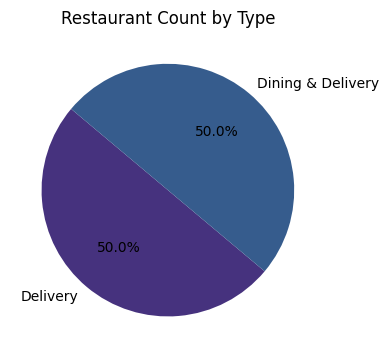

In [212]:

# visualize the distribution of restaurant_type
restaurant_type_counts = df_chennai_chinese.groupby('restaurant_type')['restaurant_name'].nunique()

# set plot size
plt.figure(figsize=(4, 4))

# plot pie chart
plt.pie(restaurant_type_counts, labels=restaurant_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))

# add title
plt.title('Restaurant Count by Type')

# save the plot
plt.tight_layout()
plt.savefig('3.2.png')

# show the plot
plt.show()

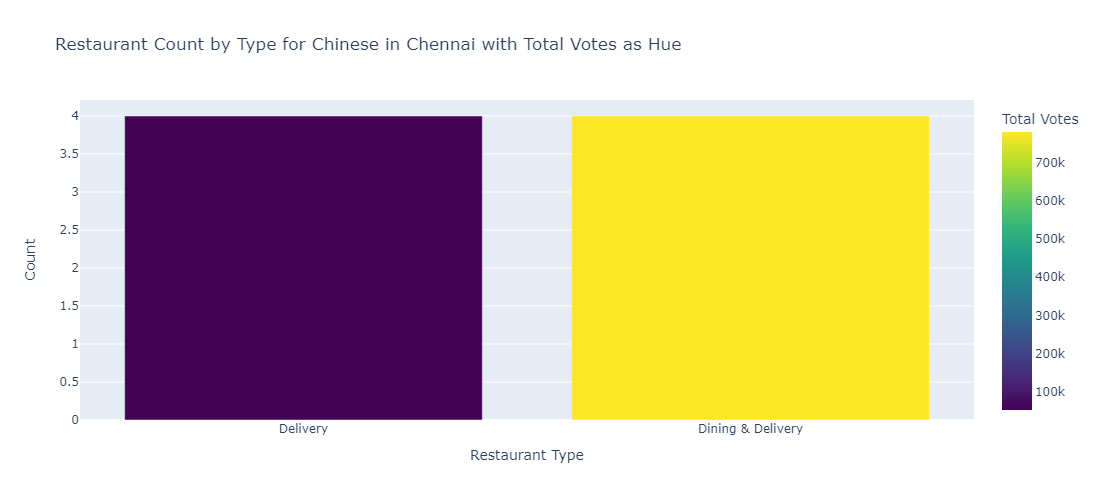

In [213]:
# plot restaurant type vs restaurant count with total_votes as hue

# group by restaurant type
biryani_restaurant_type_counts = df_chennai_chinese.groupby('restaurant_type')['restaurant_name'].nunique().reset_index()

# add a new column for total votes
biryani_restaurant_type_counts['total_votes'] = df_chennai_chinese.groupby('restaurant_type')['total_votes'].sum().values

# create bar plot
fig = px.bar(biryani_restaurant_type_counts, x='restaurant_type', y='restaurant_name',
             color='total_votes', color_continuous_scale='Viridis',
             labels={'restaurant_type': 'Restaurant Type', 'restaurant_name': 'Count', 'total_votes': 'Total Votes'},
             title='Restaurant Count by Type for Chinese in Chennai with Total Votes as Hue')

# order in descending
fig.update_xaxes(categoryorder='total descending')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()

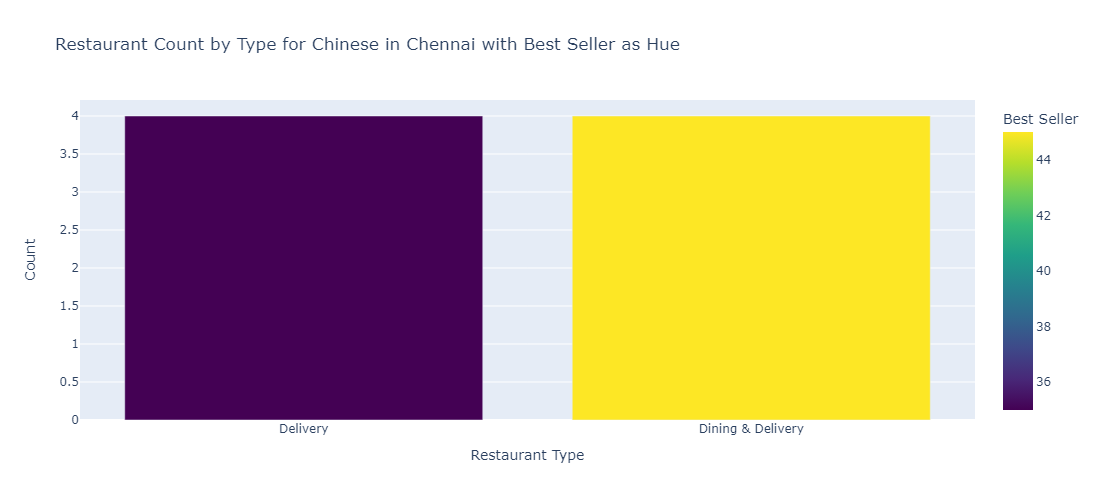

In [214]:
# plot restaurant type vs restaurant count with best_seller as hue

# group by restaurant type
biryani_restaurant_type_counts = df_chennai_chinese.groupby('restaurant_type')['restaurant_name'].nunique().reset_index()

# add a new column for total votes
biryani_restaurant_type_counts['best_seller'] = df_chennai_chinese.groupby('restaurant_type')['best_seller'].sum().values

# create bar plot
fig = px.bar(biryani_restaurant_type_counts, x='restaurant_type', y='restaurant_name',
             color='best_seller', color_continuous_scale='Viridis',
             labels={'restaurant_type': 'Restaurant Type', 'restaurant_name': 'Count', 'best_seller': 'Best Seller'},
             title='Restaurant Count by Type for Chinese in Chennai with Best Seller as Hue')

# order in descending
fig.update_xaxes(categoryorder='total descending')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()

In [215]:
# identify the best selling items based on item_votes

# filter the best selling items
filtered_data = df_chennai_chinese[df_chennai_chinese['best_seller'] == 1]

# group data by item_name and calculate the sum of item_votes
grouped_data = filtered_data.groupby('item_name')['votes_items'].sum().reset_index()

# sort the data by item_votes in descending order
sorted_data = grouped_data.sort_values(by='votes_items', ascending=False)

# 10 best selling items
sorted_data[['item_name', 'votes_items']].head(10)

,item_name,votes_items
17,Chicken Fried Rice,549
48,Grilled Chicken,514
18,Chicken Fried Rice Combo,197
65,Tandoori Chicken,166
38,Dragon Chicken,144
7,Chicken Biryani with Chicken 65 Combo,140
0,BBQ Chicken,117
29,Chicken Schezwan Fried Rice,102
23,Chicken Malabar Biryani,86
35,Chilli Chicken,79


In [216]:
df.columns

Index(['restaurant_name', 'dining_rating', 'delivery_rating', 'dining_votes',
       'delivery_votes', 'cuisine', 'place_name', 'city', 'item_name',
       'best_seller', 'votes_items', 'prices', 'total_votes'],
      dtype='object')

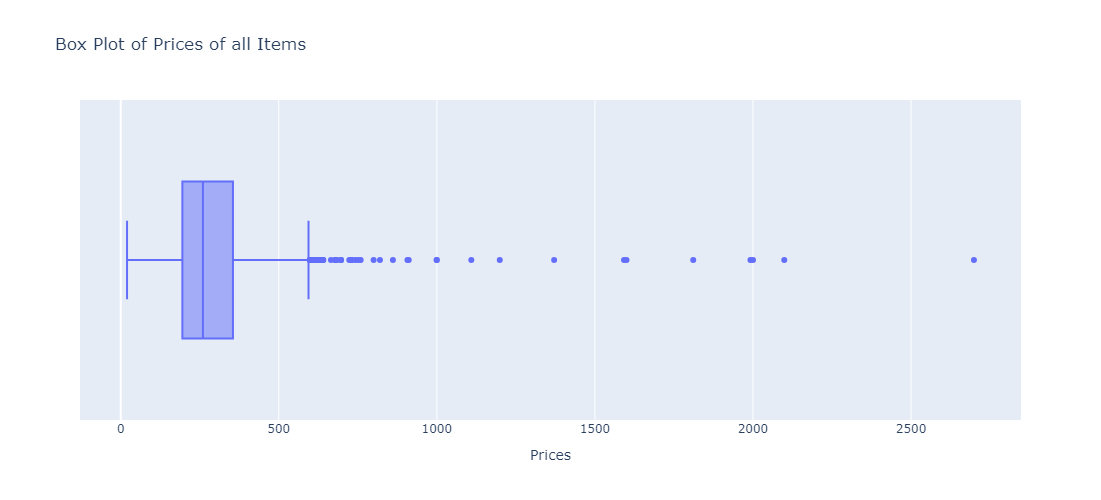

In [217]:
# plot boxplot of prices of all items

fig = px.box(df_chennai_chinese, x='prices', title='Box Plot of Prices of all Items')
fig.update_layout(xaxis_title='Prices')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()

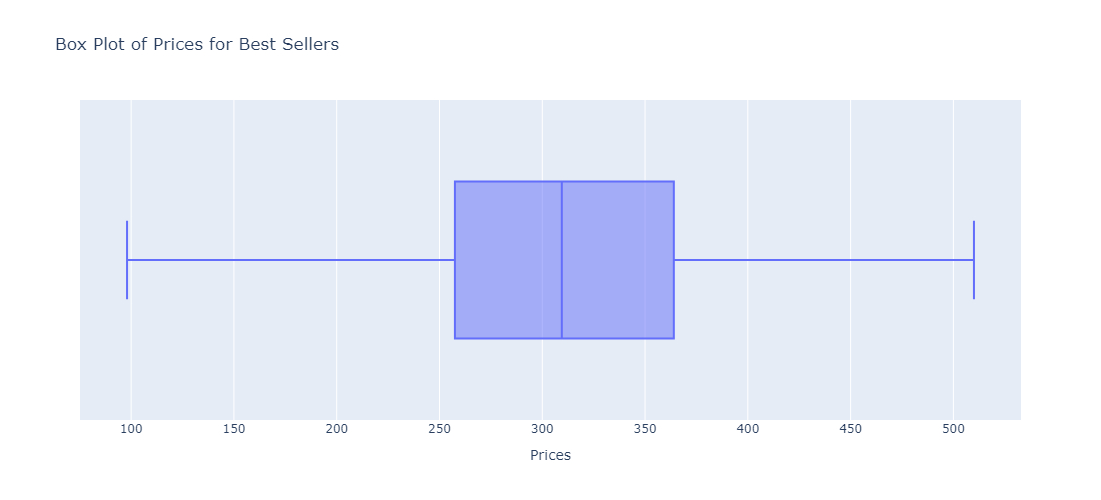

In [218]:
# plot boxplot of prices of best-selling items

fig = px.box(df_chennai_chinese[df_chennai_chinese['best_seller'] == 1], x='prices', title='Box Plot of Prices for Best Sellers')
fig.update_layout(xaxis_title='Prices')

# set the plot size
fig.update_layout(width=800, height=500)

# show the plot
fig.show()
     

In [219]:
# group data by restaurant name
grouped_data = df_chennai_chinese.groupby('restaurant_name')

# calculate the number of best-selling items and average price for each restaurant
summary_data = grouped_data.agg(
    total_votes=pd.NamedAgg(column='votes_items', aggfunc='sum'),
    best_selling_items=pd.NamedAgg(column='best_seller', aggfunc='sum'),
    average_price=pd.NamedAgg(column='prices', aggfunc='mean')
)

# sort the data in descending order based on total votes
summary_data = summary_data.sort_values(by='total_votes', ascending=False)

# show the results
summary_data[['total_votes', 'best_selling_items', 'average_price']]

,total_votes,best_selling_items,average_price
restaurant_name,,,
Savoury Sea Shell,4151,14,342.618375
Kim Ling Chinese Restaurant,1489,12,293.631179
BBQ Master,1426,12,214.914894
Nxtdoor,1282,0,167.662022
WOW! China,761,8,264.004202
Ponnusamy Hotel,182,9,237.965986
Grill A Delics,138,11,253.671756
Wangs Kitchen,76,14,403.135135
